## Confronto tra crescita aritmetica e geometrica

Confronto tra la crescita "aritmetica" $x_{i+1}=x_i+\delta$ e la crescita "geometrica" $x_{i+1}=x_i+\delta\cdot x_i$, con $\delta$ numero casualmente scelto tra due, con probabilità 50%.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def growth(delta,rel_delta,x0,N):

    # seed?
    r = np.random.randint(2,size=N)
    s = np.zeros(len(r))
    s[r==0] = delta[0]
    s[r==1] = delta[1]

    # Dx = r Dt
    vec = np.concatenate([[x0],s])
    lin_growth = np.cumsum(vec)

    # Dx = rx Dt
    log_growth = np.zeros(len(vec))
    log_growth[0] = x0

    s[r==0] = rel_delta[0]
    s[r==1] = rel_delta[1]

    for i in range(len(r)):
        log_growth[i+1] = log_growth[i]+s[i]*log_growth[i]

    class Result():
        def __init__(self):
           self.r = 0

    Result.r = r
    Result.lin_growth = lin_growth
    Result.log_growth = log_growth

    return Result

- delta è l'array con i due numeri per la crescita aritmetica;
- rel_delta quello per la crescita geometrica;
- x0 è il punto iniziale;
- N è la lunghezza della traiettoria;
- M è il numero di traiettorie.

In [3]:
delta = [-0.5,0.7]
rel_delta = np.array(delta)#/100
x0 = 100
N = 1000

M = 100

In [4]:
rs = []
lin_growths = []
log_growths = []

for i in range(M):
    out = growth(delta,rel_delta,x0,N)

    rs.append(out.r)
    lin_growths.append(out.lin_growth)
    log_growths.append(out.log_growth)

In [5]:
lin_mean = np.mean(lin_growths,axis=0)
log_mean = np.mean(log_growths,axis=0)
log_mean_geom = np.exp(np.mean(np.log(log_growths),axis=0)) # geometric average

Plot di confronto delle due crescite:
- con stessi valori $\delta\in\{-0.5,0.7\}$ in entrambi i casi, la crescita aritmetica è positiva (aumenta), quella geometrica è negativa (diminuisce);
- confronta anche con $\delta\in\{-0.5,0.5\}$, in questo caso, la crescita aritmetica è nulla (valor medio costante), mentre quella geometrica è negativa.

In conclusione, anche se il valor medio è $\bar\delta=0.1$ positivo per $\delta\in\{-0.5,0.7\}$, il carattere geometrico del rumore $\delta \cdot x_i$ rende il drift negativo (il valor medio di $\log x$ diminuisce).

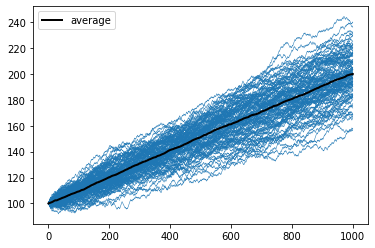

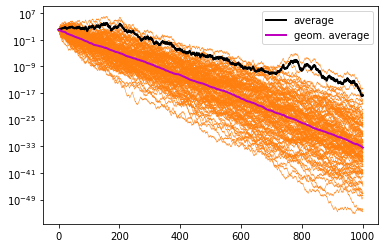

In [6]:
lw = 0.5

for i in range(M):
    plt.plot(lin_growths[i],'-',linewidth=lw,color='tab:blue')
plt.plot(lin_mean,'-',linewidth=2,color='k',label='average')

plt.legend()

plt.figure()
for i in range(M):
    plt.plot(log_growths[i],'-',linewidth=lw,color='tab:orange')
plt.plot(log_mean,'-',linewidth=2,color='k',label='average')
plt.plot(log_mean_geom,'-',linewidth=2,color='m',label='geom. average')

plt.yscale('log')
# plt.ylim([0,10000])
plt.legend()
plt.show()


Crescita geometrica: confronto tra scala dell'asse y lineare o logaritmica
- guardando in scala lineare, è difficile vedere un andamento generale, che invece è evidente in scala logaritmica;
- la media geometrica è più rappresentativa della media aritmetica, che invece è biased dalle traiettorie con valori più grandi.

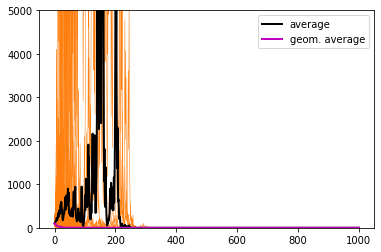

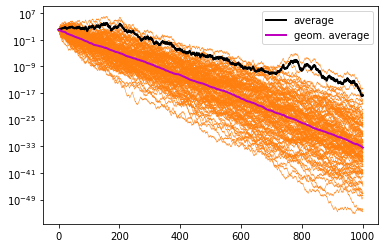

In [12]:
lw = 0.5

plt.figure()
for i in range(M):
    plt.plot(log_growths[i],'-',linewidth=lw,color='tab:orange')
plt.plot(log_mean,'-',linewidth=2,color='k',label='average')
plt.plot(log_mean_geom,'-',linewidth=2,color='m',label='geom. average')

plt.ylim([0,5000])
plt.legend()

plt.figure()
for i in range(M):
    plt.plot(log_growths[i],'-',linewidth=lw,color='tab:orange')
plt.plot(log_mean,'-',linewidth=2,color='k',label='average')
plt.plot(log_mean_geom,'-',linewidth=2,color='m',label='geom. average')

plt.yscale('log')
plt.legend()
plt.show()


Se anzichè estrarre $\delta$ tra due possibili valori lo estraggo da una distribuzione gaussiana con media $\mu$ e varianza $\sigma^2$, la crescita aritmetica è descritta da
\begin{equation}
x_{i+1} = x_i + \mu + \sigma r
\end{equation}
(moto Browniano) e la crescita geometrica da
\begin{equation}
x_{i+1} = x_i + \mu x_i + \sigma x_i r
\end{equation}
(moto Browniano geometrico). Partendo dalla crescita geometrica e passando alla variabile $y=\log x$, ritrovo una crescita aritmetica
\begin{equation}
y_{i+1} = y_i + \Bigl(\mu-\frac{1}{2} \sigma^2\Bigr) + \sigma r,
\end{equation}
dove però il termine di drift non è più solo $\mu$ ma $\mu-\frac{1}{2} \sigma^2$, con un contributo dato dal rumore moltiplicativo $\sigma x_i r$. Ciò significa che il valor medio del $\log x$ aumenta (o diminuisce) con velocità (di drift) $\mu-\frac{1}{2} \sigma^2$: qualunque sia $\mu$, per varianza $\sigma^2$ sufficientemente grande, l'effetto è di diminuire il valor medio del $\log x$.

Vedi https://it.wikipedia.org/wiki/Moto_browniano_geometrico.
